In [0]:
import os
import re
import datetime
import numpy as np
from PIL import Image
from glob import glob
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
def prepae_data():
    x, t = [], []

    categorized_dir_paths = glob('/content/drive/My Drive/kikagaku/novelapp/data/images/categorized/*')

    for dir_path in categorized_dir_paths:
        category_id = os.path.basename(dir_path)
        image_paths = glob(os.path.join(dir_path, '*'))
        print(datetime.datetime.now().isoformat(), 'Category:', category_id, len(image_paths))

        for i, p in enumerate(image_paths):
            book_id = re.sub(r'(_.*$)', '', os.path.basename(p))
            print(datetime.datetime.now().isoformat(), 'Image:', i, book_id, category_id)

            try:
                img = Image.open(p)
                img_resize = img.resize((229, 229))
                img_np = np.array(img_resize) / 255.0
                img_reshape = img_np.reshape(1, 229, 229, 3)
                #print(datetime.datetime.now().isoformat(), img_np.shape, img_reshape.shape)

                x.append(img_np)
                t.append(category_id)

            except Exception as e:
                print(datetime.datetime.now().isoformat(), 'Error:', e)

    return x, t

In [3]:
x, t = prepae_data()

2020-05-26T10:33:07.774555 Category: 0 30
2020-05-26T10:33:07.775569 Image: 0 3998 0
2020-05-26T10:33:08.548252 Image: 1 4057 0
2020-05-26T10:33:09.066284 Image: 2 4055 0
2020-05-26T10:33:09.755343 Image: 3 4015 0
2020-05-26T10:33:10.039279 Image: 4 4002 0
2020-05-26T10:33:10.384667 Image: 5 4023 0
2020-05-26T10:33:10.848499 Image: 6 4028 0
2020-05-26T10:33:11.416117 Image: 7 4074 0
2020-05-26T10:33:11.735929 Image: 8 4068 0
2020-05-26T10:33:11.937688 Image: 9 4075 0
2020-05-26T10:33:12.193720 Image: 10 4058 0
2020-05-26T10:33:12.866360 Image: 11 4020 0
2020-05-26T10:33:13.277247 Image: 12 4021 0
2020-05-26T10:33:13.730825 Image: 13 4079 0
2020-05-26T10:33:14.061855 Image: 14 4071 0
2020-05-26T10:33:14.543003 Image: 15 3996 0
2020-05-26T10:33:15.089295 Image: 16 4063 0
2020-05-26T10:33:15.686237 Image: 17 4051 0
2020-05-26T10:33:16.089273 Image: 18 4019 0
2020-05-26T10:33:16.423460 Image: 19 4004 0
2020-05-26T10:33:16.873218 Image: 20 4077 0
2020-05-26T10:33:17.088022 Image: 21 3997 0


In [4]:
x = np.array(x).astype('f')
t = np.array(t).astype('f')
print(x.shape, t.shape)

(63, 229, 229, 3) (63,)


In [0]:
import tensorflow as tf
from tensorflow import keras

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_val, t_train, t_val = train_test_split(x, t, test_size=0.3, random_state=0)

In [0]:
import os
import random

def reset_seed(seed=0):

    os.environ['PYTHONHASHSEED'] = '0'
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)

In [8]:
print(np.unique(t))
print(len(np.unique(t)))

[0. 1. 2. 3. 4.]
5


In [0]:
category_count = len(np.unique(t))

In [0]:
from tensorflow.keras import models,layers

reset_seed(0)

model = models.Sequential()

model.add(layers.Conv2D(3, (3, 3), activation='relu', input_shape=(229, 229, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(50, activation='relu'))
model.add(layers.Dense(category_count, activation='softmax'))

optimizer = keras.optimizers.Adam(lr=0.01)

model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [0]:
batch_size = 20
epochs = 30

In [12]:
history = model.fit(x_train, t_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_val, t_val))

Epoch 1/30
3/3 [==============================] - 0s 136ms/step - loss: 29.4696 - accuracy: 0.3409 - val_loss: 14.7943 - val_accuracy: 0.2105
Epoch 2/30
3/3 [==============================] - 0s 25ms/step - loss: 6.6857 - accuracy: 0.2955 - val_loss: 3.3942 - val_accuracy: 0.1053
Epoch 3/30
3/3 [==============================] - 0s 25ms/step - loss: 0.8156 - accuracy: 0.6818 - val_loss: 1.8774 - val_accuracy: 0.2632
Epoch 4/30
3/3 [==============================] - 0s 24ms/step - loss: 0.3448 - accuracy: 0.8864 - val_loss: 2.0648 - val_accuracy: 0.3684
Epoch 5/30
3/3 [==============================] - 0s 29ms/step - loss: 0.1509 - accuracy: 0.9773 - val_loss: 3.9082 - val_accuracy: 0.4211
Epoch 6/30
3/3 [==============================] - 0s 24ms/step - loss: 0.0316 - accuracy: 1.0000 - val_loss: 4.9545 - val_accuracy: 0.4211
Epoch 7/30
3/3 [==============================] - 0s 25ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 4.3894 - val_accuracy: 0.4211
Epoch 8/30
3/3 [========

In [0]:
results = pd.DataFrame(history.history)

In [14]:
results.head()

,loss,accuracy,val_loss,val_accuracy
0,29.469604,0.340909,14.794307,0.210526
1,6.685743,0.295455,3.394151,0.105263
2,0.815598,0.681818,1.877418,0.263158
3,0.344828,0.886364,2.064804,0.368421
4,0.150854,0.977273,3.908246,0.421053


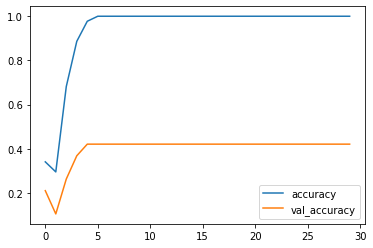

In [15]:
results[['accuracy', 'val_accuracy']].plot()

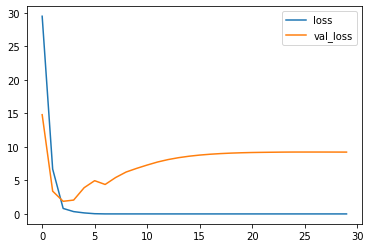

In [16]:
results[['loss', 'val_loss']].plot()

In [0]:
model.save('/content/drive/My Drive/kikagaku/novelapp/category_model.h5', include_optimizer=False)